In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/TCS.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

         Date Symbol Series  Prev Close    Open    High     Low    Last  \
0  2004-08-25    TCS     EQ      850.00  1198.7  1198.7  979.00  985.00   
1  2004-08-26    TCS     EQ      987.95   992.0   997.0  975.30  976.85   
2  2004-08-27    TCS     EQ      979.00   982.4   982.4  958.55  961.20   
3  2004-08-30    TCS     EQ      962.65   969.9   990.0  965.00  986.40   
4  2004-08-31    TCS     EQ      986.75   986.5   990.0  976.00  987.80   

    Close     VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  987.95  1008.32  17116372  1.725876e+15     NaN             5206360   
1  979.00   985.65   5055400  4.982865e+14     NaN             1294899   
2  962.65   969.94   3830750  3.715586e+14     NaN              976527   
3  986.75   982.65   3058151  3.005106e+14     NaN              701664   
4  988.10   982.18   2649332  2.602133e+14     NaN              695234   

   %Deliverble  
0       0.3042  
1       0.2561  
2       0.2549  
3       0.2294  
4       0.2624  


In [4]:
# Descriptive statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  4139.000000  4139.000000  4139.000000  4139.000000  4139.000000   
mean   1693.843549  1695.594081  1715.882302  1673.585709  1694.310184   
std     722.879316   722.978228   728.450096   717.780248   723.177934   
min     366.650000   360.000000   377.750000   358.000000   365.700000   
25%    1106.250000  1105.525000  1120.275000  1088.575000  1107.000000   
50%    1633.500000  1625.000000  1655.000000  1610.000000  1630.050000   
75%    2326.125000  2321.800000  2345.000000  2301.300000  2325.000000   
max    3603.700000  3625.000000  3674.800000  3572.550000  3610.750000   

             Close         VWAP        Volume      Turnover         Trades  \
count  4139.000000  4139.000000  4.139000e+03  4.139000e+03    2456.000000   
mean   1694.371612  1694.618120  1.676762e+06  2.952102e+14   85502.709283   
std     723.061025   723.144157  1.607879e+06  3.849370e+14   56031.488595   
min     366.650000   

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166
4138,2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.411057e+14,157829.0,1942473,0.6323


In [8]:
df.shape

(4139, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64


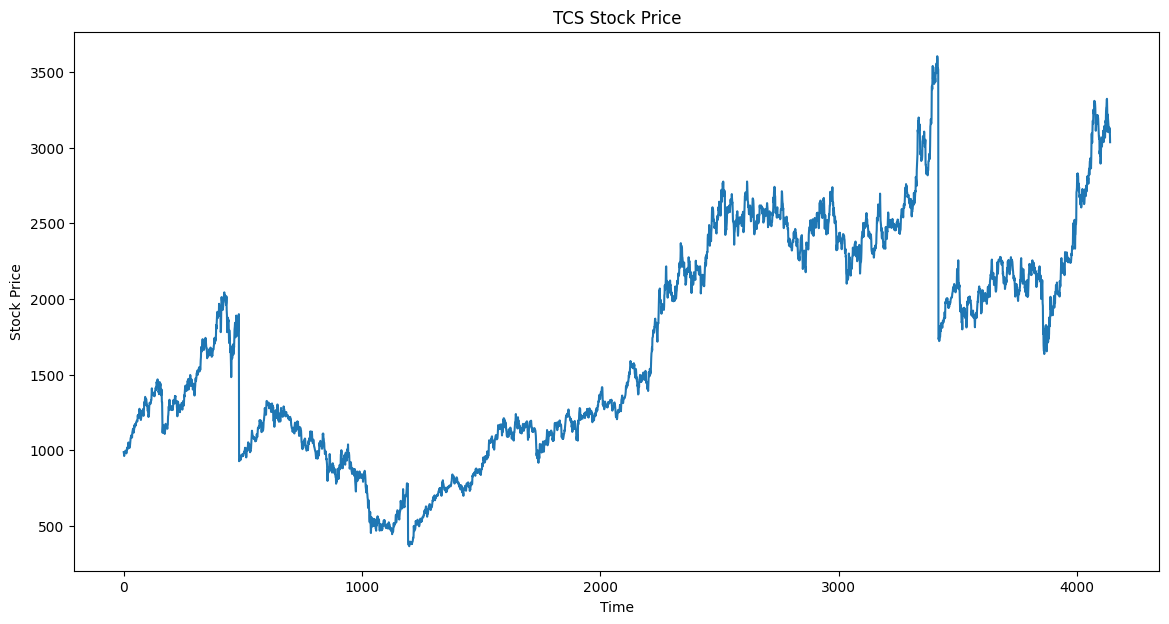

In [10]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('TCS Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [11]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [13]:
# Feature selection and scaling
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

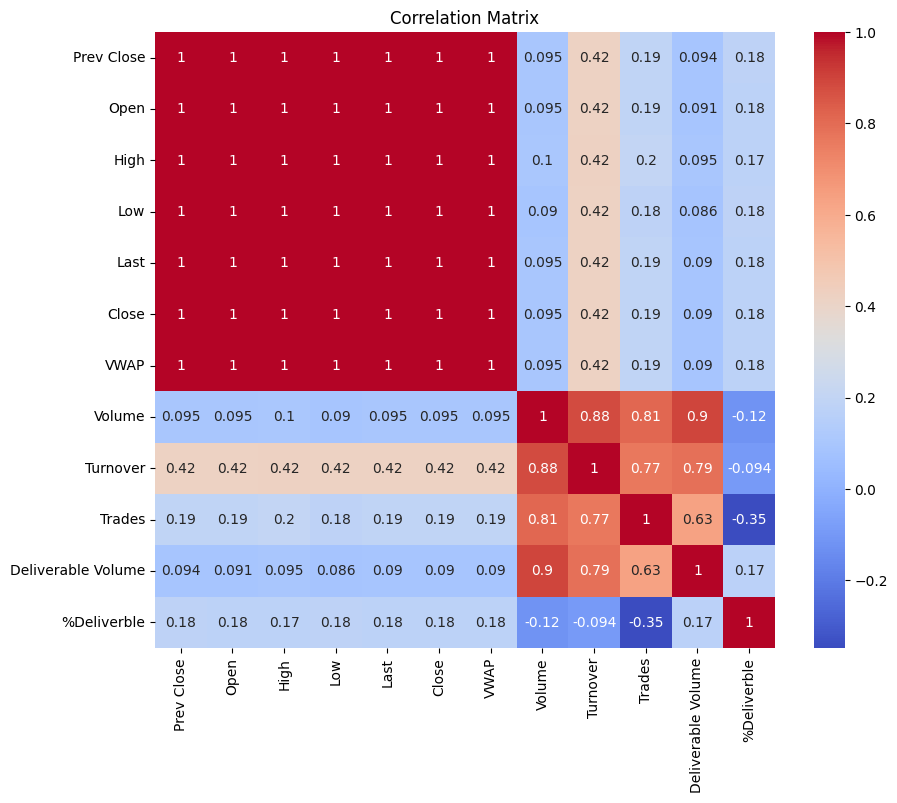

In [14]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

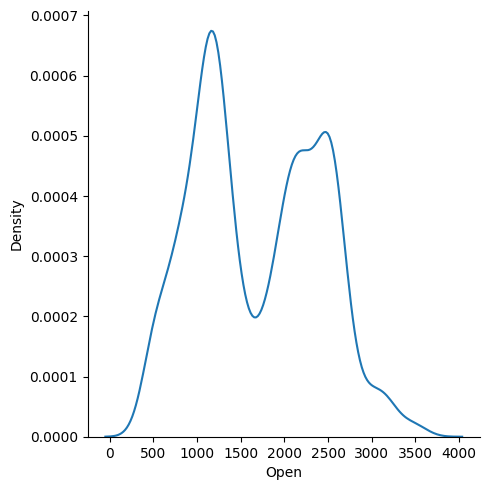

In [15]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Prev Close', ylabel='High'>

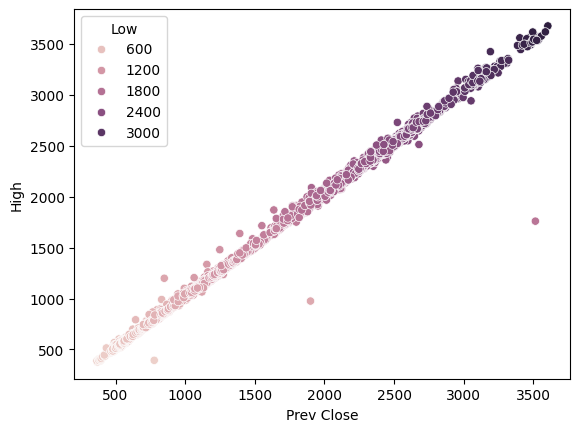

In [19]:
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

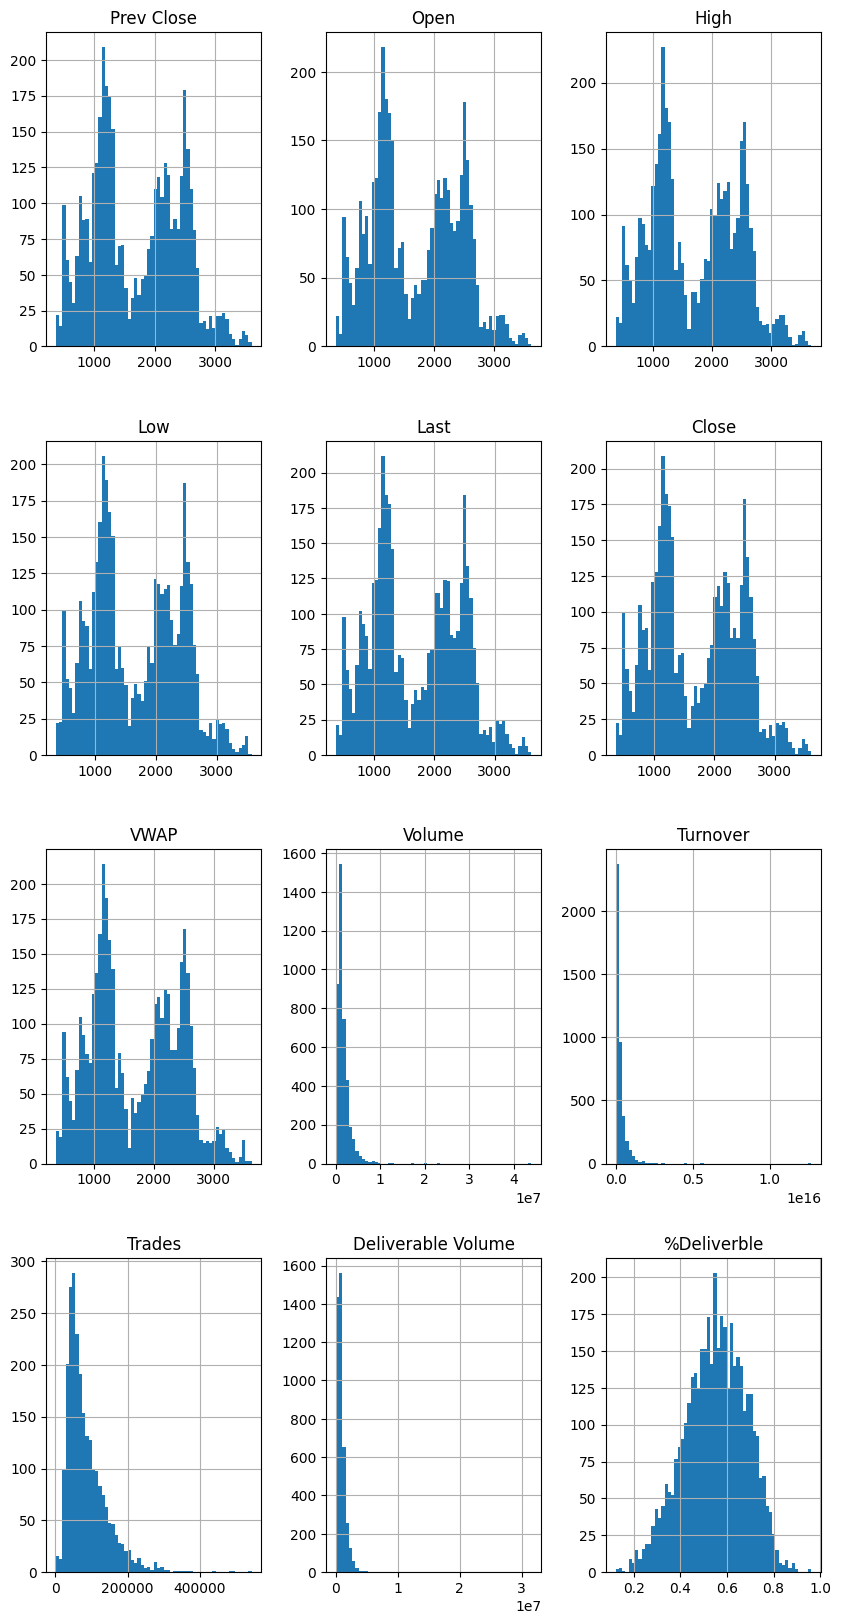

In [20]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

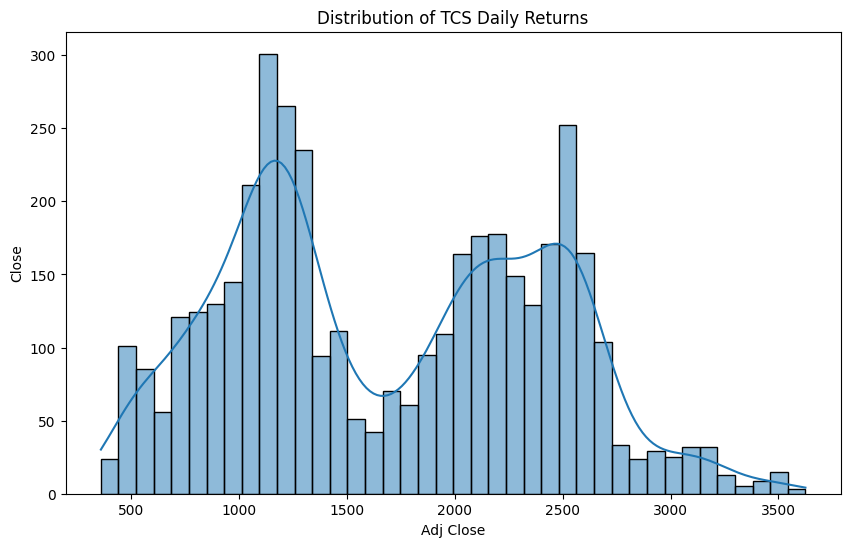

In [21]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of TCS Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

In [22]:
# Plot TCS High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='TCS '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

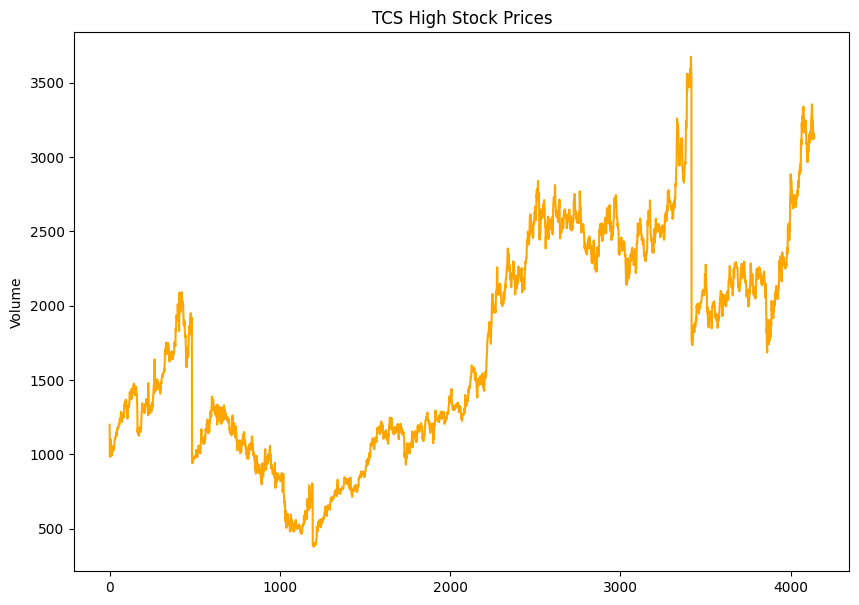

In [23]:
volume_analysis(df,'High')

In [24]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**Step 3: Implementing all Models**

**LSTM**

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Using only the 'Close' price for prediction
data = df['Close'].values.reshape(-1, 1)

In [27]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create a function to process the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [28]:
# Set time step
time_step = 100
X, Y = create_dataset(scaled_data, time_step)

In [29]:
# Split the data into training and testing datasets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [31]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

3230/3230 [==============================] - 220s 67ms/step - loss: 0.0013


In [34]:
# Predicting the stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

26/26 [==============================] - 1s 27ms/step


In [35]:
# Calculate RMSE
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1739.8647277661184
Test RMSE: 2437.23077221291


In [37]:
# Plotting the predictions
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan
# Calculate the correct starting index for the test predictions
start_idx = len(train_predict) + time_step
# The ending index should be start_idx plus the length of test predictions
end_idx = start_idx + len(test_predict)
test_plot[start_idx: end_idx, :] = test_predict # Corrected the slicing of test_plot

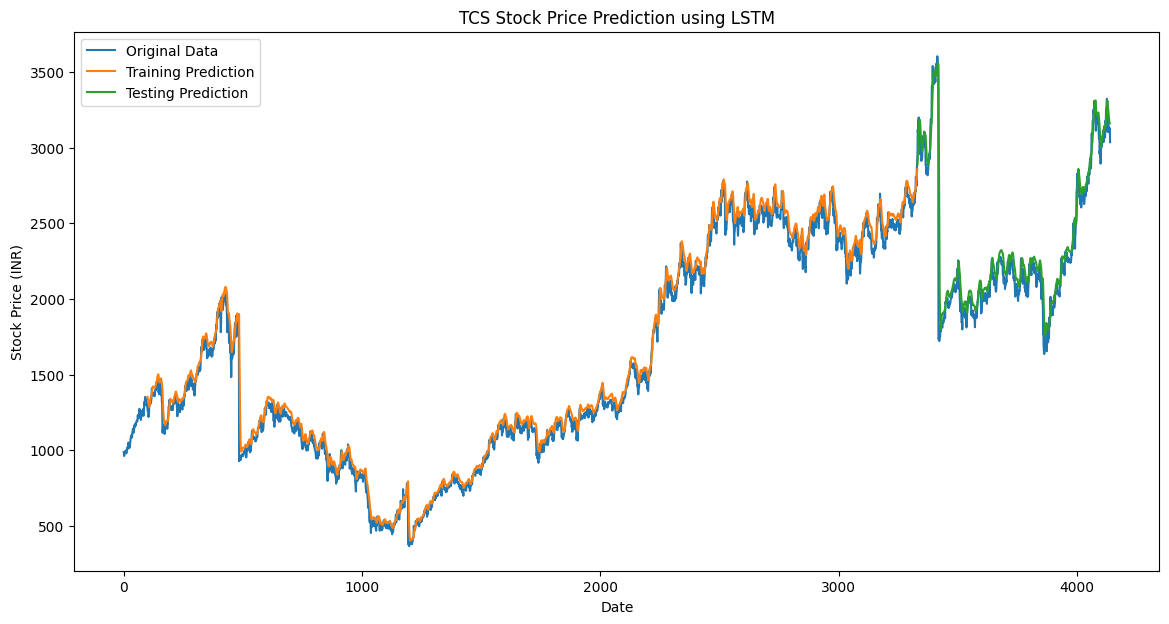

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(train_plot, label='Training Prediction')
plt.plot(test_plot, label='Testing Prediction')
plt.title('TCS Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.show()

**K-Means Clustering**

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use 'Close', 'Volume', and any other relevant features for clustering
features = ['Close', 'Volume']
df_features = df[features]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

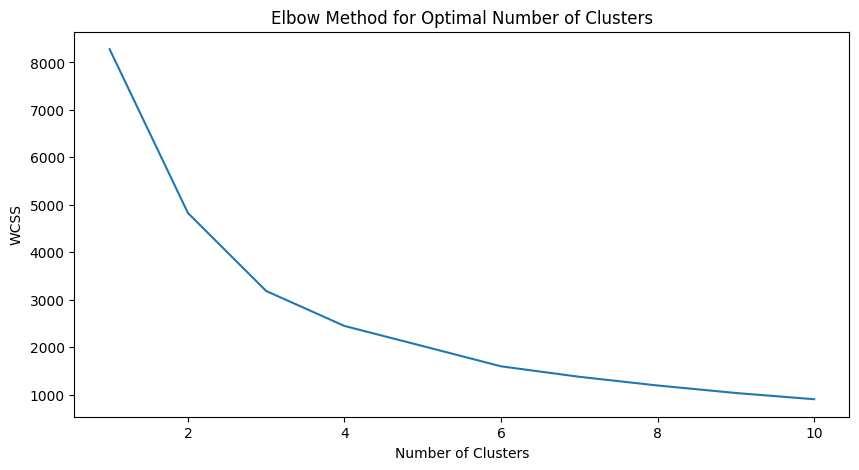

In [40]:
# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Train the K-Means model with the optimal number of clusters
optimal_clusters = 3  # Choose the optimal number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster information to the original dataframe
df['Cluster'] = clusters

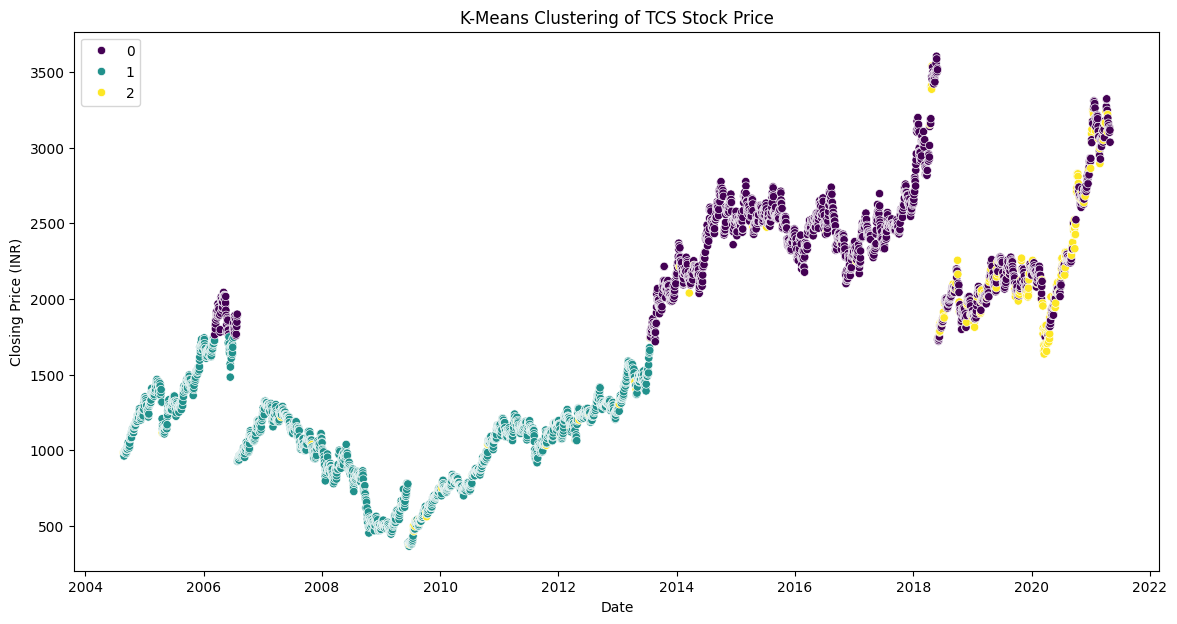

In [41]:
# Visualizing the clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Date', y='Close', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of TCS Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

**Logistic Regression**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For logistic regression, we need to create a binary target variable (e.g., price up or down)
df['Price_Up'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Use 'Close', 'Volume', and other relevant features for prediction
features = ['Close', 'Volume']
X = df[features].shift(1) # Remove .dropna() here
y = df['Price_Up']

# Align X and y by dropping rows with missing values
X = X.dropna()
y = y[X.index] # Use the index of X to select corresponding rows in y

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Predicting the results
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.46980676328502413
Confusion Matrix:
[[  0 439]
 [  0 389]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       439
           1       0.47      1.00      0.64       389

    accuracy                           0.47       828
   macro avg       0.23      0.50      0.32       828
weighted avg       0.22      0.47      0.30       828



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
